In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense

In [2]:
X,y = make_circles(n_samples=1000, noise=0.15,factor=0.4,random_state=42)

In [3]:
X

array([[ 0.29585735,  0.21837427],
       [-0.22872501,  0.18080059],
       [-0.50534674,  0.41521051],
       ...,
       [-0.00992907, -0.51382503],
       [ 0.61361939, -0.92163318],
       [ 0.26520621,  0.98503501]])

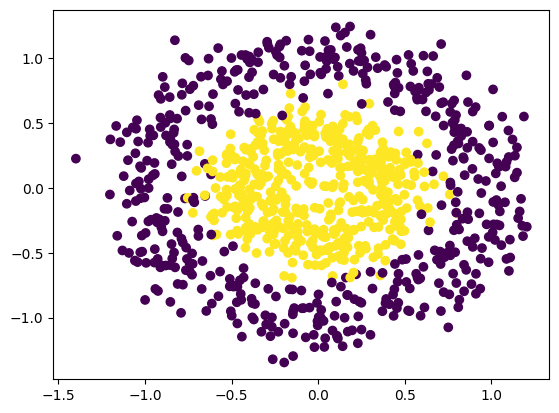

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Without Regularization

In [6]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(X_train,y_train,epochs=500,validation_split=0.2)

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6910 - loss: 0.5071 - val_accuracy: 0.9812 - val_loss: 0.1103
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9530 - loss: 0.1135 - val_accuracy: 0.9688 - val_loss: 0.0829
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9807 - loss: 0.0637 - val_accuracy: 0.9125 - val_loss: 0.3155
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9240 - loss: 0.1334 - val_accuracy: 0.9500 - val_loss: 0.1547
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9657 - loss: 0.0974 - val_accuracy: 0.9812 - val_loss: 0.0784
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9747 - loss: 0.0919 - val_accuracy: 0.9500 - val_loss: 0.1314
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9784 - loss: 0.0547 - val_accuracy: 0.9625 - val_loss: 0.0850
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9771 - loss: 0.0735 - val_accuracy: 0.9563 - 

In [9]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


(-1.5, 1.5)

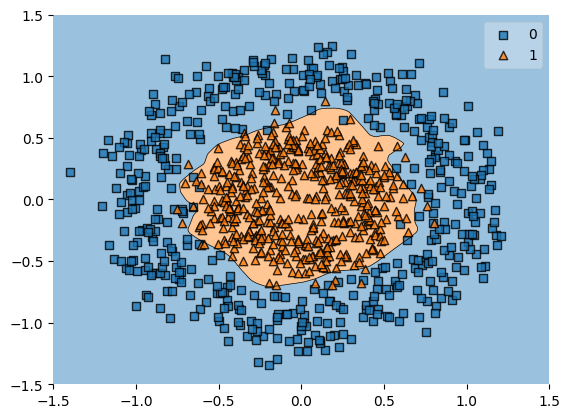

In [10]:
plot_decision_regions(X,y,clf=model)
plt.xlim((-1.5,1.5))
plt.ylim((-1.5,1.5))

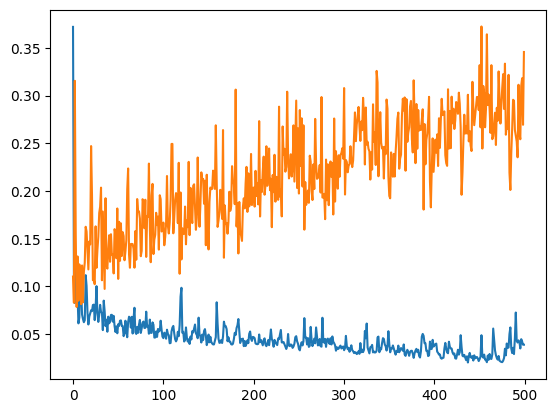

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# With Regularization

In [12]:
model1 = Sequential()

model1.add(Dense(128, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.L2(0.03), input_dim=2))
model1.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.L2(0.03)))
model1.add(Dense(1,activation='sigmoid'))

In [13]:
adam = Adam(learning_rate=0.01)
model1.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history1 = model1.fit(X_train,y_train,epochs=500,validation_split=0.2)

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5491 - loss: 2.5833 - val_accuracy: 0.5000 - val_loss: 0.8434
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5736 - loss: 0.8097 - val_accuracy: 0.6438 - val_loss: 0.6961
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7622 - loss: 0.6563 - val_accuracy: 0.8500 - val_loss: 0.5840
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8861 - loss: 0.5597 - val_accuracy: 0.9750 - val_loss: 0.4508
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9620 - loss: 0.4499 - val_accuracy: 0.9563 - val_loss: 0.4235
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9292 - loss: 0.4384 - val_accuracy: 0.9375 - val_loss: 0.4413
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9365 - loss: 0.4196 - val_accuracy: 0.9812 - val_loss: 0.3626
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9139 - loss: 0.4224 - val_accuracy: 0.8875 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


(-1.5, 1.5)

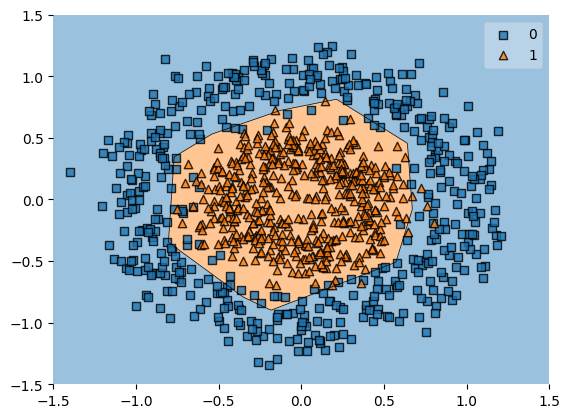

In [15]:
plot_decision_regions(X,y,clf=model1)
plt.xlim((-1.5,1.5))
plt.ylim((-1.5,1.5))

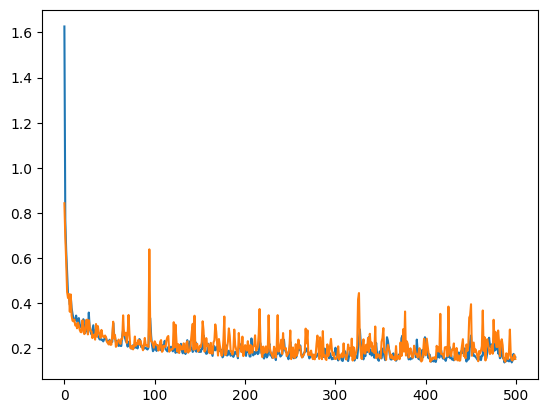

In [16]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])